Connecté à Python 3.12.6

In [ ]:
# Importation de la base de données
canada = pd.read_excel(r"d:\Projet Informatique\Bases de données\Base Crowdfunding.xlsx")
canada.tail() #Affichage des 05 dernières lignes

,ID_des entreprises,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Type de financement,Revenus nets (en milliers d'€)
39,40,230,87,crowdlending,500
40,41,435,88,reward crowdfunding,700
41,42,890,90,equity crowdfunding,999
42,43,908,56,reward crowdfunding,800
43,44,458,89,crowdlending,666


In [ ]:
canadl = canada.select_dtypes(exclude=['object'])

In [ ]:
# Aanalyses exploratoires des données
    # Détection et supression des données manquantes
missing_data = canadl[canadl.duplicated()]
if not missing_data.empty:
    print('La base de données contient des données manquantes')
    msno.bar(canadl)
    canadl = canadl.drop_duplicates()
else:
    print("La base de données est sans danger")
    canadl

La base de données est sans danger


In [ ]:
# Détection des valeurs aberrantes
Q1 = canadl.quantile(0.25)
Q3 = canadl.quantile(0.75)
IQR = Q3 - Q1
outlier = ((canadl < (Q1 - 1.5 * IQR)) | (canadl > (Q3 + 1.5 * IQR)))
valeurs_aberrantes = canadl[outlier.any(axis=1)] 

if not valeurs_aberrantes.empty:
    print('Datasets contains outliers')
    valeurs_aberrantes
else:
    print('Dataset is cleaned, no danger', canadl)

Datasets contains outliers


In [ ]:
valeurs_aberrantes

,ID_des entreprises,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
19,20,980,200,990
25,26,978,210,995


In [ ]:
canadl = canadl.drop(valeurs_aberrantes.index) #Sup^pression des données abérrantes

In [ ]:
canadl #AFFICHAGE DE LA NOUVELLE BASE DE DONNEE

,ID_des entreprises,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
0,1,200,55,400
1,2,400,37,500
2,3,500,76,700
3,4,500,35,350
4,5,270,15,500
5,6,400,27,500
6,7,300,15,430
7,8,700,40,780
8,9,210,23,300
9,10,250,12,430


In [ ]:
# Statistique descriptive
statistic_canada = canadl.describe()
statistic_canada #résultat de la statistique

,ID_des entreprises,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
count,42.000000,42.000000,42.000000,42.000000
mean,22.476190,523.809524,67.476190,633.452381
std,13.137617,246.027288,29.057754,214.026805
min,1.000000,200.000000,12.000000,300.000000
25%,11.250000,341.250000,46.250000,462.500000
50%,22.500000,456.500000,67.000000,627.500000
75%,33.750000,756.250000,89.750000,800.000000
max,44.000000,987.000000,125.000000,999.000000


<Axes: >

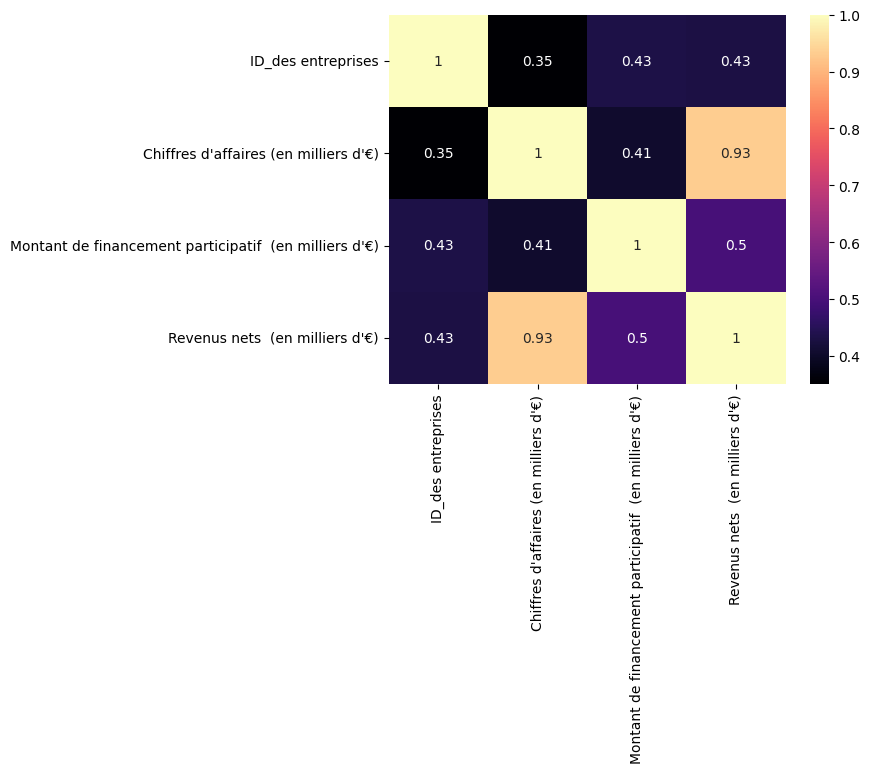

In [ ]:
# Matrice de corrélation
corr_canada = canadl.corr()
sns.heatmap(corr_canada, annot=True, cmap='magma')

C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` varia

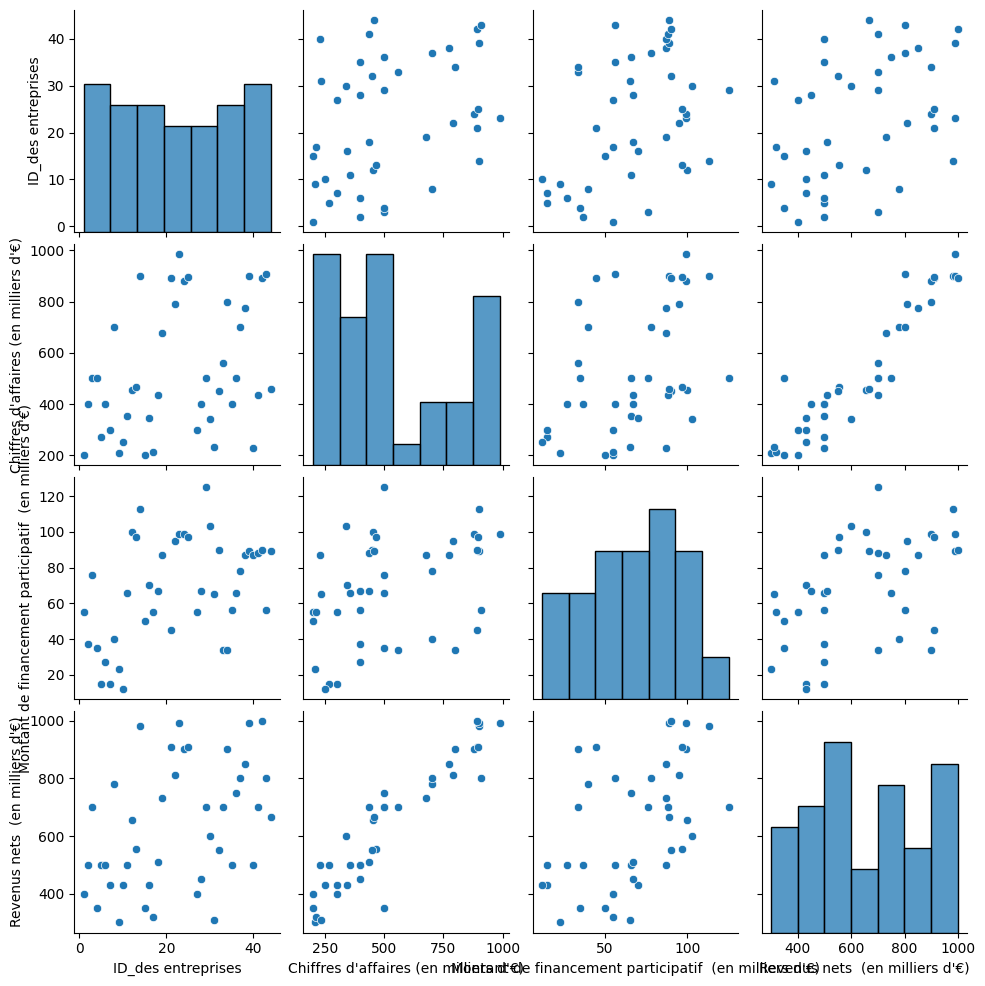

In [ ]:
# Visualisation des variables 
sns.pairplot(canadl, palette="cividis")

[Text(0.5, 1.0, "Relation en les revenus nets et le chiffre d'affaire"),
 Text(0.5, 0, 'Montant de financement participatif'),
 Text(0, 0.5, "Chiffred d'affaire")]

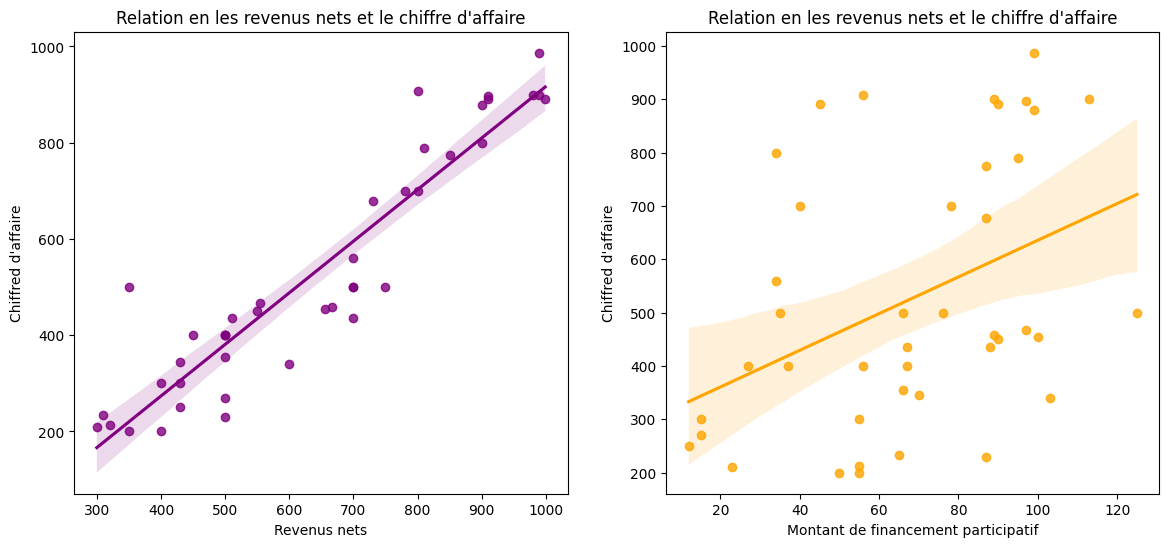

In [ ]:
# Visualisation des relations entre la cible et les prédicteurs
fig, ax = plt.subplots(1,2, figsize =(14,6))
sns.regplot(data=canadl, x='Revenus nets  (en milliers d\'€)', y= 'Chiffres d\'affaires (en milliers d\'€)', color='purple', ax=ax[0] )
ax[0].set(
    title=('Relation en les revenus nets et le chiffre d\'affaire'),
    xlabel=('Revenus nets'),
    ylabel=('Chiffred d\'affaire')
)
sns.regplot(data=canadl, x='Montant de financement participatif  (en milliers d\'€)', y= 'Chiffres d\'affaires (en milliers d\'€)', color='orange', ax=ax[1] )
ax[1].set(
    title=('Relation en les revenus nets et le chiffre d\'affaire'),
    xlabel=('Montant de financement participatif'),
    ylabel=('Chiffred d\'affaire')
)

In [ ]:
# BIBLIOTHEQUE DE MACHINE LEARNING
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
# Normalisation des données
scaler =MinMaxScaler()
variables = ['Chiffres d\'affaires (en milliers d\'€)','Montant de financement participatif  (en milliers d\'€)','Revenus nets  (en milliers d\'€)']
canadl[variables]= scaler.fit_transform(canadl[variables])
canadl #Base de données normalisée

,ID_des entreprises,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
0,1,0.000000,0.380531,0.143062
1,2,0.254130,0.221239,0.286123
2,3,0.381194,0.566372,0.572246
3,4,0.381194,0.203540,0.071531
4,5,0.088945,0.026549,0.286123
5,6,0.254130,0.132743,0.286123
6,7,0.127065,0.026549,0.185980
7,8,0.635324,0.247788,0.686695
8,9,0.012706,0.097345,0.000000
9,10,0.063532,0.000000,0.185980


In [ ]:
canadl =canadl.drop(columns=['ID_des entreprises']) #suppression de la variable id des entreprises


In [ ]:
canadl

,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
0,0.000000,0.380531,0.143062
1,0.254130,0.221239,0.286123
2,0.381194,0.566372,0.572246
3,0.381194,0.203540,0.071531
4,0.088945,0.026549,0.286123
5,0.254130,0.132743,0.286123
6,0.127065,0.026549,0.185980
7,0.635324,0.247788,0.686695
8,0.012706,0.097345,0.000000
9,0.063532,0.000000,0.185980


In [ ]:
# Préparation des données
x = canadl.drop(columns=['Chiffres d\'affaires (en milliers d\'€)']) #les prédicteurs
y = canadl['Chiffres d\'affaires (en milliers d\'€)'] #la cible

# Division des données en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=808)

# Ajout des constants
x_train_const=sm.add_constant(x_train)
x_test_const=sm.add_constant(x_test)

In [ ]:
# Division des données en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=808)

# Ajout des constants
x_train_const=sm.add_constant(x_train)
x_test_const=sm.add_constant(x_test)

# Entraînement du modèle 
model=sm.OLS(y_train,x_train_const).fit()
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Chiffres d'affaires (en milliers d'€)   R-squared:                       0.887
Model:                                               OLS   Adj. R-squared:                  0.880
Method:                                    Least Squares   F-statistic:                     117.8
Date:                                   Sun, 22 Sep 2024   Prob (F-statistic):           6.22e-15
Time:                                           18:31:26   Log-Likelihood:                 26.637
No. Observations:                                     33   AIC:                            -47.27
Df Residuals:                                         30   BIC:                            -42.78
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

In [ ]:
# Prédiction
y_pred = model.predict(x_test_const)

# Evaluation de la capacité prédictive
print('MAE:',mean_absolute_error(y_pred,y_test))
print('MAPE:', mean_absolute_percentage_error(y_pred, y_test))

MAE: 0.1076401452983168
MAPE: 0.39541176656979693


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Tester le modèle de la forêt aléatoire 
# Initialisation du modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(x_train_const, y_train)

# Prédictions
y_pred_rf = rf_model.predict(x_test_const)

# Évaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MAPE: {mape_rf}")

Random Forest MAE: 0.09037131159113361
Random Forest MAPE: 65420777306248.28


In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# Méthode régularisée (Lasso et Ridge)
# Initialisation des modèles
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Entraînement des modèles
ridge_model.fit(x_train_const, y_train)
lasso_model.fit(x_train_const, y_train)

# Prédictions
y_pred_ridge = ridge_model.predict(x_test_const)
y_pred_lasso = lasso_model.predict(x_test_const)

# Évaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)

print(f"Ridge MAE: {mae_ridge}")
print(f"Ridge MAPE: {mape_ridge}")
print(f"Lasso MAE: {mae_lasso}")
print(f"Lasso MAPE: {mape_lasso}")

Ridge MAE: 0.15018261596972501
Ridge MAPE: 99753206640733.06
Lasso MAE: 0.23872781179007355
Lasso MAPE: 227165511988579.62


In [ ]:
# Selection des MAE de chaque modèle : 
print(f"Ridge MAE: {mae_ridge}")
print(f"Lasso MAE: {mae_lasso}")
print(f"Random Forest MAE: {mae_rf}")
print('LinearRegression MAE:',mean_absolute_error(y_pred,y_test))

Ridge MAE: 0.15018261596972501
Lasso MAE: 0.23872781179007355
Random Forest MAE: 0.09037131159113361
LinearRegression MAE: 0.1076401452983168


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Améliortion de la capacité prédictive du modèle "Forêt aléatoire"
# Définir les paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisation du modèle
rf_model = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train_const, y_train)

# Meilleurs paramètres
print(f"Best parameters: {grid_search.best_params_}")

# Prédictions avec le meilleur modèle
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(x_test_const)

# Évaluation
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_best_rf)

print(f"Optimized Random Forest MAE: {mae_best_rf}")
print(f"Optimized Random Forest MAPE: {mape_best_rf}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Random Forest MAE: 0.09236840961707665
Optimized Random Forest MAPE: 59709629070066.414


In [ ]:
# Feature engineering
# Exemple de création de nouvelles caractéristiques
canadl['new_var'] = canadl['Revenus nets  (en milliers d\'€)'] * canadl['Montant de financement participatif  (en milliers d\'€)']

# Réentraînement du modèle avec les nouvelles caractéristiques
x = canadl.drop(columns=['Chiffres d\'affaires (en milliers d\'€)'])
y = canadl['Chiffres d\'affaires (en milliers d\'€)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=808)
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

best_rf_model.fit(x_train_const, y_train)
y_pred_best_rf = best_rf_model.predict(x_test_const)

mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_best_rf)

print(f"Optimized Random Forest with New Features MAE: {mae_best_rf}")

Optimized Random Forest with New Features MAE: 0.08518026104783957


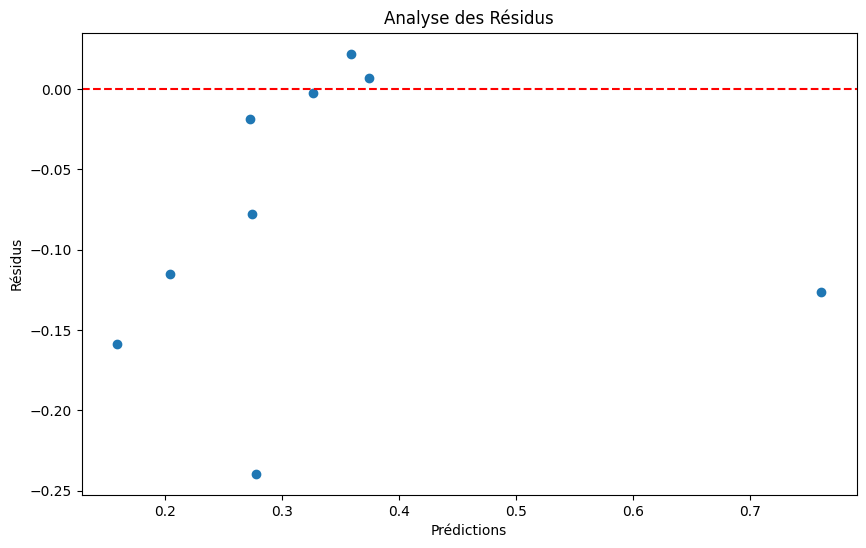

In [ ]:
# Analyse des résidus
# Calcul des résidus
residuals = y_test - y_pred_best_rf

# Visualisation des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_rf, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Analyse des Résidus')
plt.show()